In [1]:
import pandas as pd
import seaborn as sb

data=pd.read_csv("data.csv")
data.head()

,States,Recharge from rainfallMonsoon season,Recharge from other sources,Recharge from rainfallNon-monsoon season,Total_Rainfall,Natural discharge during non-monsoon season,Net annual groundwater availability,Irrigation,Domestic and industrial uses,Total_Usage,Projected demand for domestic and industrial uses upto 2025,Groundwater availability for future irrigation use,Situation
0,Andhra Pradesh,15.1,6.5000,5.5,33.8,3.1,30.8,12.600,1.500,14.200,2.70,15.9,EXCESS
1,Arunachal Pradesh,3.4,0.0003,1.0,4.5,0.5,4.0,0.002,0.001,0.003,0.01,4.0,SEMICRITICAL
2,Assam,19.0,2.2000,8.6,30.4,2.5,27.8,5.300,0.700,6.000,1.00,21.5,EXCESS
3,Bihar,18.9,3.9000,3.4,28.6,2.4,26.2,9.800,1.600,11.400,2.60,13.9,MODERATED
4,Chhattisgarh,9.9,0.6000,0.9,12.2,0.6,11.6,3.100,0.500,3.600,0.60,7.9,MODERATED


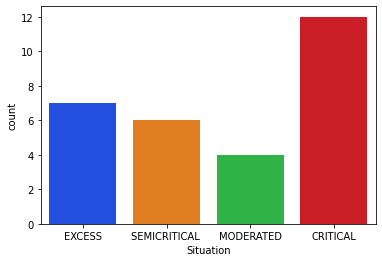

In [2]:
sb.countplot(x='Situation',data=data,palette='bright')
X = data.iloc[:, [4,5,6,9,10,11]]
Y = data.iloc[:,12]

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
from sklearn.metrics import accuracy_score
score =accuracy_score(Y_test,y_pred)

In [6]:
Availabilty = pd.get_dummies(data['Situation'],drop_first=True)
data.drop(['Situation'],axis=1,inplace=True)
data1 = pd.concat([data,Availabilty],axis=1)
X = data1.iloc[:, [4,5,6,9,10,11]]
Y = data1.iloc[:,12]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.55, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
new_score=classifier.score(X_test, Y_test)

In [9]:
classifier.score(X_test, Y_test)

0.9375

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Text(0.5, 1.0, 'Accuracy Score: 0.9375')

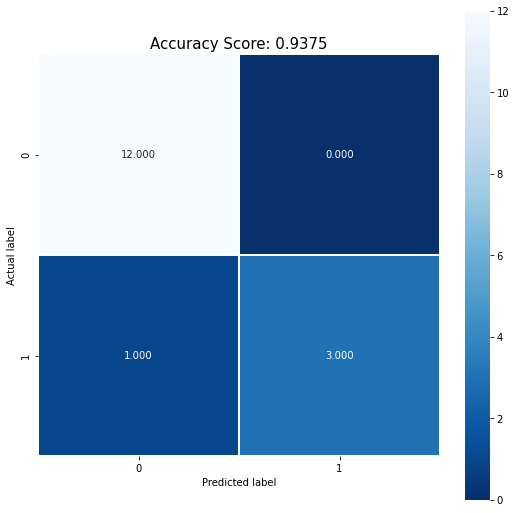

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(new_score)
plt.title(all_sample_title, size = 15)